Principal Component Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. 
Each of the principal components is chosen in such a way so that it would describe most of them still available variance and all these principal components are orthogonal to each other. In all principal components first principal component has a maximum variance.
 

Uses of PCA: 

It is used to find inter-relation between variables in the data.
It is used to interpret and visualize data.
The number of variables is decreasing it makes further analysis simpler.
It’s often used to visualize genetic distance and relatedness between populations.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/data%20for%20MEGA/MEGA_20f.csv'
dataset = pd.read_csv(data)
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: ignored

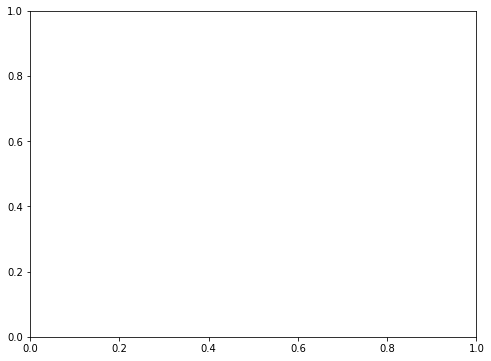

In [20]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 12) # number of features after PCA
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_test.res



plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1], X_test[:,0])
plt.xlabel('first principal component')
plt.ylabel('second principal component')

print(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')










 
explained_variance = pca.explained_variance_ratio_
print("Shape of train:",X_train.shape)
print("Shape of train:",X_test.shape)

In [14]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [17]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[    0  3203     0     0   704]
 [    0 12634     0     0   337]
 [    0  6949     0     0    58]
 [    0  5223     0     0   290]
 [    0  3487     0     0  2904]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          N1       0.00      0.00      0.00      3907
          N2       0.40      0.97      0.57     12971
          N3       0.00      0.00      0.00      7007
           R       0.00      0.00      0.00      5513
           W       0.68      0.45      0.54      6391

    accuracy                           0.43     35789
   macro avg       0.22      0.29      0.22     35789
weighted avg       0.27      0.43      0.30     35789

Accurecy:  0.43415574617899355


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724]


Text(0, 0.5, 'Cumulative explained variance')

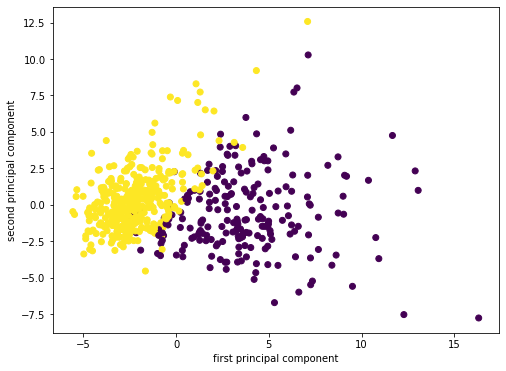

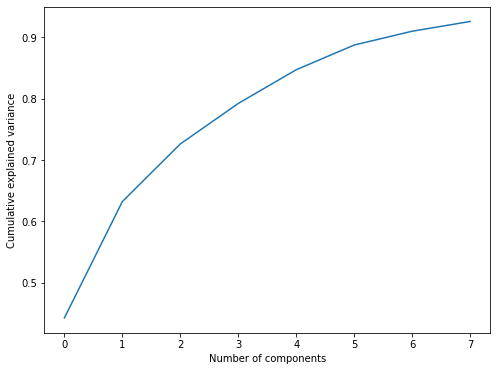

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_target = cancer.target

scaler = StandardScaler()
cancer_data = scaler.fit_transform(cancer_data)

pca = PCA(n_components=8)

pca_cancer_data = pca.fit_transform(cancer_data)
cancer_target = cancer_target.reshape(-1,1)

plt.figure(figsize=(8,6))
plt.scatter(pca_cancer_data[:,0],pca_cancer_data[:,1], c=cancer_target[:,0])
plt.xlabel('first principal component')
plt.ylabel('second principal component')

print(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')